In [2]:

import os
import sys
import pyspark
from pyspark.sql import SQLContext
import pandas as pd
from pyspark import SparkContext, SparkConf
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('GCSFilesRead').getOrCreate()
spark.conf.set("spark.sql.debug.maxToStringFields", 1000)

In [3]:
'''
from google.cloud import storage

gcs_client = storage.Client()
bucket = gcs_client.bucket('datasetsbdp')
'''

"\nfrom google.cloud import storage\n\ngcs_client = storage.Client()\nbucket = gcs_client.bucket('datasetsbdp')\n"

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json'


In [5]:
#spark._jsc.hadoopConfiguration().set("google.cloud.auth.service.account.json.keyfile","/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json")

In [5]:
!hdfs dfs -ls 'gs://datasetsbdp/'


ls: Error reading credential file from environment variable GOOGLE_APPLICATION_CREDENTIALS, value '/Users/xiantang/Desktop/BigDataPlatform/Project/yelp_dataset/iconic-being-343500-f1cb28ff8582.json': File does not exist.


In [6]:
PROJECT_ID="BDPYelpFinalProject"
bucket_name = "datasetsbdp"
path_review = f"gs://{bucket_name}/dataset_review.json"
path_tip = f"gs://{bucket_name}/dataset_tip.json"
path_user = f"gs://{bucket_name}/dataset_user.json"
path_checkin = f"gs://{bucket_name}/dataset_checkin.json"
path_business = f"gs://{bucket_name}/dataset_business.json"
#gs://bdpproject/yelp_academic_dataset_review.json

## For df_review: stars column only have 1~5: 5 distinct numbers.

In [7]:
df_review=spark.read.json(path_review)
df_review.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [17]:
df_review.count()

6990280

In [18]:
df_review.select('stars').distinct().show()

+-----+
|stars|
+-----+
|  1.0|
|  4.0|
|  3.0|
|  2.0|
|  5.0|
+-----+



In [8]:
df_tip = spark.read.json(path_tip)
df_tip.show(5)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|ld0AperBXk1h6Ubqm...|
+--------------------+----------------+-------------------+--------------------+--------------------+
only showing top 5 rows



In [20]:
df_tip.select('compliment_count').distinct().show()

+----------------+
|compliment_count|
+----------------+
|               0|
|               5|
|               6|
|               1|
|               3|
|               2|
|               4|
+----------------+



In [9]:
df_user = spark.read.json(path_user)
df_user.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [10]:
df_checkin = spark.read.json(path_checkin)
df_checkin.show(5)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



In [11]:
df_business = spark.read.json(path_business)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

## cleaning df_business 

In [24]:
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [25]:
df_business=df_business.select('business_id','name','city','stars','review_count','categories')

In [26]:
df_business.show(2)

+--------------------+--------------------+-------------+-----+------------+--------------------+
|         business_id|                name|         city|stars|review_count|          categories|
+--------------------+--------------------+-------------+-----+------------+--------------------+
|Pns2l4eNsfO8kk83d...|Abby Rappoport, L...|Santa Barbara|  5.0|           7|Doctors, Traditio...|
|mpf3x-BjTdTEA3yCZ...|       The UPS Store|       Affton|  3.0|          15|Shipping Centers,...|
+--------------------+--------------------+-------------+-----+------------+--------------------+
only showing top 2 rows



# Cleaning df_review

In [12]:
df_review=df_review.select('business_id','date','stars','text','user_id')

In [13]:
df_review.show(2)

+--------------------+-------------------+-----+--------------------+--------------------+
|         business_id|               date|stars|                text|             user_id|
+--------------------+-------------------+-----+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|OyoGAe7OKpv6SyGZT...|
+--------------------+-------------------+-----+--------------------+--------------------+
only showing top 2 rows



In [14]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler

#varIdxer = StringIndexer(inputCol='strVar',outputCol='varIdx').fit(factors)
#factors = varIdxer.transform(factors)

In [30]:
# What is the average number of reviews per business? 


total_review_count=df_business.agg(F.sum("review_count")).collect()[0][0]

total_business=df_business.select('business_id').distinct().count()

avg_review=total_review_count/total_business

print('the average number of reviews per business is :',avg_review)

the average number of reviews per business is : 44.86656113232144


In [31]:
#What is the stars distribution? 
#x: star 1 to 5 ; y: num of reviews 

star_dist_plot=df_review.groupby('stars').count().toPandas()

star_dist_plot=star_dist_plot.sort_values(by=['count'])

Text(0, 0.5, 'Review_Count')

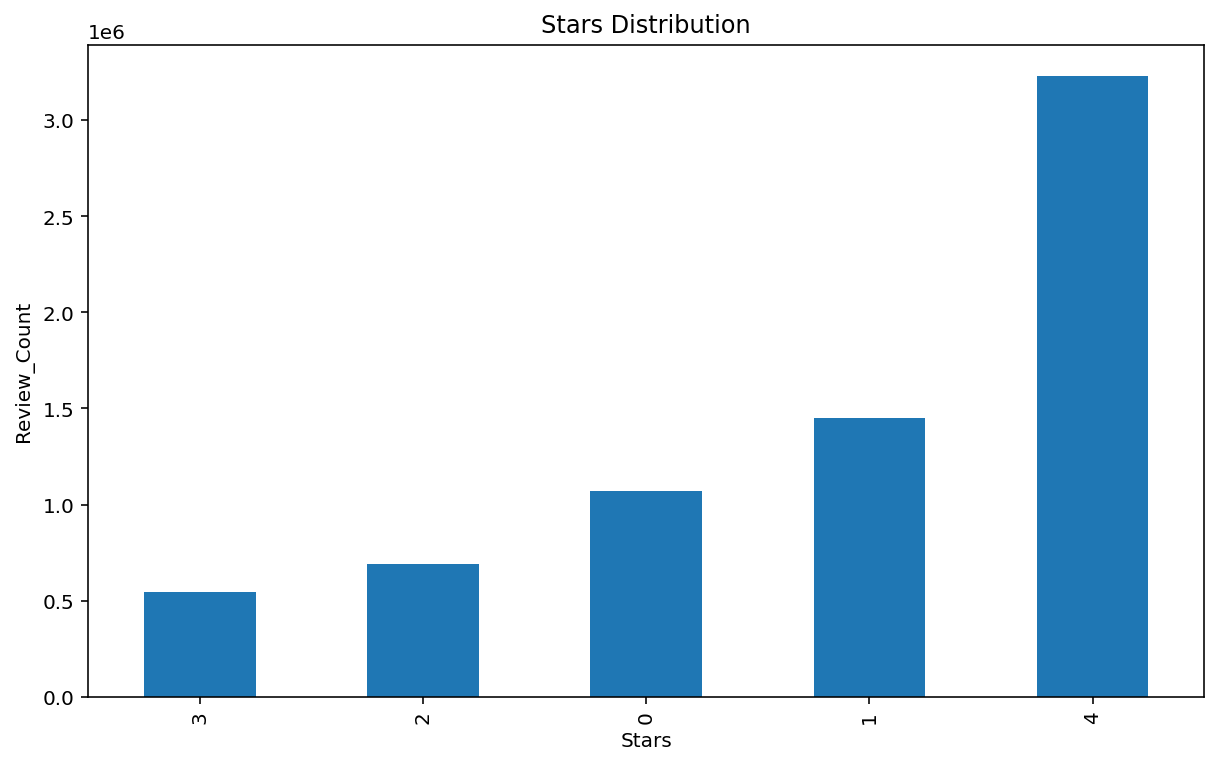

In [32]:
#Plotting 

# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
star_dist_plot['count'].plot(kind="bar", title="stars distribution")

plt.title("Stars Distribution")
plt.xlabel("Stars")
plt.ylabel("Review_Count")

# Text Preprocessing

In [33]:
## remove special character: keeps only letters, space and numbers 
## PipeLine: Tokenization, stopword, word2vec, 

In [15]:
df_review.show(5)

+--------------------+-------------------+-----+--------------------+--------------------+
|         business_id|               date|stars|                text|             user_id|
+--------------------+-------------------+-----+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|2014-02-05 20:30:30|  3.0|Family diner. Had...|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|2015-01-04 00:01:03|  5.0|Wow!  Yummy, diff...|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|2017-01-14 20:54:15|  4.0|Cute interior and...|bcjbaE6dDog4jkNY9...|
+--------------------+-------------------+-----+--------------------+--------------------+
only showing top 5 rows



In [16]:
# remove special characters
from pyspark.sql.functions import regexp_replace, col

df_review=df_review.withColumn("text", regexp_replace(col("text"), "'/[^a-z0-9 ]+/i'", " "))

### Build pipeline for Tokenization, stopword, word2vec 

In [17]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Word2Vec
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.feature import HashingTF, IDF


tokenizer = Tokenizer(inputCol="text", outputCol="words")  #tokenize words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")  #remove stop words
word2Vec = Word2Vec(vectorSize=100, inputCol="filtered", outputCol="features")

### Implement Pipeline

In [ ]:
pipeline = Pipeline(stages=[tokenizer, remover, word2Vec])
df_review_nlp = pipeline.fit(df_review).transform(df_review)

22/03/12 10:56:48 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/03/12 10:56:48 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [ ]:
df_review_nlp.show(5)

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|         business_id|               date|stars|                text|             user_id|               words|            filtered|            features|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|  3.0|If you decide to ...|mh_-eMZ6K5RLWhZyI...|[if, you, decide,...|[decide, eat, her...|[0.00980463082312...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|  5.0|I've taken a lot ...|OyoGAe7OKpv6SyGZT...|[i've, taken, a, ...|[taken, lot, spin...|[0.06728812187725...|
|YjUWPpI6HXG530lwP...|2014-02-05 20:30:30|  3.0|Family diner. Had...|8g_iMtfSiwikVnbP2...|[family, diner., ...|[family, diner., ...|[-0.0068525894545...|
|kxX2SOes4o-D3ZQBk...|2015-01-04 00:01:03|  5.0|Wow!  Yummy, diff...|_7bHUi9

In [20]:
df_review_nlp.count()

6990280

In [21]:
df_review_nlp.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[0.00980463082312...|
|[0.06728812187725...|
|[-0.0068525894545...|
|[0.03081508976174...|
|[0.03522218355248...|
+--------------------+
only showing top 5 rows



In [ ]:
## Identify if a customer like or dislike the restaurant 

In [ ]:
##Step 1: remove star3, convert 1,2 to 0; 4,5 to 1. 


In [22]:
#remove star 3 
df_review_nlp=df_review_nlp.filter(df_review_nlp.stars != 3)

In [23]:
#categorize stars to bad(0) and good (1)
from pyspark.sql.functions import regexp_replace
df_review_nlp=df_review_nlp.withColumn('stars', regexp_replace('stars', '1.0', '0'))

df_review_nlp=df_review_nlp.withColumn('stars', regexp_replace('stars', '2.0', '0'))

df_review_nlp=df_review_nlp.withColumn('stars', regexp_replace('stars', '4.0', '1'))

df_review_nlp=df_review_nlp.withColumn('stars', regexp_replace('stars', '5.0', '1'))

In [24]:
df_review_nlp.select('stars').distinct().show()

+-----+
|stars|
+-----+
|    0|
|    1|
+-----+



In [26]:
from pyspark.sql.types import IntegerType

df_review_nlp = df_review_nlp.withColumn("stars", df_review_nlp["stars"].cast(IntegerType()))

## Split test and train data 

In [27]:
train_df, test_df = df_review_nlp.randomSplit([.8,.2],seed=666)

## Model 1: Logistic Regression Model

In [28]:
df_review_nlp.dtypes

[('business_id', 'string'),
 ('date', 'string'),
 ('stars', 'int'),
 ('text', 'string'),
 ('user_id', 'string'),
 ('words', 'array<string>'),
 ('filtered', 'array<string>'),
 ('features', 'vector')]

In [29]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression

In [30]:
#Logistic Regression Model
lr = LogisticRegression(featuresCol = 'features', labelCol='stars', maxIter=10) # maxIter=10, regParam=0.01

# Predict each point's label and show the results.
lrm = lr.fit(train_df)
predictions = lrm.transform(test_df)

In [31]:
predictions.show(5)


+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|         business_id|               date|stars|                text|             user_id|               words|            filtered|            features|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|-02xFuruu85XmDn2x...|2014-09-11 01:12:16|    1|I have been going...|7jOaJw3txVFlkHB7Y...|[i, have, been, g...|[going, family, v...|[0.06484698632777...|[-5.2822425956671...|[0.00505533703999...|       1.0|
|-0Ym1Wg3bXd_TDz8J...|2018-07-09 01:29:36|    1|Neat and trendy l...|a_qVF8ybTqqTkWrhf...|[neat, and, trend...|[neat, trendy, li...|[0.11797223139613...|[-5.2221648397870..

In [ ]:
#print evaluation metrics
#evaluator = BinaryClassificationEvaluator(labelCol="stars", rawPredictionCol="prediction")

In [ ]:
#evaluator.evaluate(predictions)

In [ ]:
#evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})

In [ ]:
#predictions.show(5)

In [32]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [33]:
#print evaluation metrics
evaluator = MulticlassClassificationEvaluator(labelCol="stars", predictionCol="prediction")

print('Logistic Regression')
print('accuracy:',evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print('f1:',evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

Logistic Regression


accuracy: 0.9474397070550382


f1: 0.9472945457939297


## K Fold Cross validation for Logistic Regression

In [ ]:
df_review_nlp.show()

In [34]:
df_review_nlp=df_review_nlp.withColumnRenamed('stars','label')

In [35]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
import tempfile

In [36]:
lr = LogisticRegression()

In [37]:
grid = ParamGridBuilder().addGrid(lr.maxIter, [0, 1]).build()

In [38]:
evaluator = BinaryClassificationEvaluator()

In [39]:
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator,
    parallelism=2)

In [ ]:
cvModel = cv.fit(df_review_nlp)

In [ ]:
cvModel.getNumFolds()

3

In [ ]:
# It confirms the function call returns the metrics on the test dataset.
cvModel.avgMetrics[0]

0.5

In [ ]:
#area under ROC
evaluator.evaluate(cvModel.transform(df_review_nlp))

0.9277334328910288

In [ ]:
cvModel.avgMetrics

[0.5, 0.9277328212711858]

## Random Forest

In [45]:
from pyspark.ml.classification import RandomForestClassifier


In [46]:
# Set parameters for the Random Forest.
rfc = RandomForestClassifier(maxDepth=5, numTrees=15, impurity="gini", labelCol="stars", predictionCol="prediction")

# Fit the model to the data.
rfcm = rfc.fit(train_df)

# Given a dataset, predict each point's label, and show the results.
predictions = rfcm.transform(test_df)

In [48]:
#print evaluation metrics

evaluator = MulticlassClassificationEvaluator(labelCol="stars", predictionCol="prediction")

print('Random Forest')
print('accuracy:',evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print('f1:', evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

Random Forest


accuracy: 0.8615612887356632


f1: 0.8471563765287868


In [49]:
from pyspark.ml.classification import LinearSVC


In [50]:
lsvc = LinearSVC(labelCol="stars", maxIter=50,predictionCol="prediction")

In [51]:
rfcm = lsvc.fit(train_df)

In [52]:
predictions = rfcm.transform(test_df)

In [53]:
predictions.show(3)

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|         business_id|               date|stars|                text|             user_id|               words|            filtered|            features|       rawPrediction|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|-02xFuruu85XmDn2x...|2014-09-11 01:12:16|    1|I have been going...|7jOaJw3txVFlkHB7Y...|[i, have, been, g...|[going, family, v...|[0.06484698632777...|[-3.0411404093057...|       1.0|
|-0Ym1Wg3bXd_TDz8J...|2018-07-09 01:29:36|    1|Neat and trendy l...|a_qVF8ybTqqTkWrhf...|[neat, and, trend...|[neat, trendy, li...|[0.11797223139613...|[-3.2168363690869...|       1.0|
|-0Ym1Wg3bXd_TDz8J...|2018-07-10 02:58:15|    1|I walked in on a ...|J

In [54]:
predictions=predictions.withColumnRenamed('stars','label')

In [ ]:
#print evaluation metrics
print('LinearSVC')
evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
acc = evaluator.evaluate(predictions)
print("Prediction Accuracy: ", acc)


print('accuracy:',evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print('f1:', evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))

LinearSVC


Prediction Accuracy:  0.9482490349558241


accuracy: 0.9482490349558241


f1: 0.9481117266482638
